In [32]:
import math
import random

import pylab


In [33]:
class Position(object):
    """
    A Position represents a location in a two-dimensional room, where
    coordinates are given by floats (x, y).
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def get_x(self):
        return self.x
    
    def get_y(self):
        return self.y
    
    def get_new_position(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: float representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.get_x(), self.get_y()
        
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        
        return Position(new_x, new_y)

    def __str__(self):  
        return "Position: " + str(math.floor(self.x)) + ", " + str(math.floor(self.y))

In [34]:
position = Position(2.9,5.34).get_new_position(240,2)

In [35]:
position.get_x()

1.1679491924311232

In [36]:
math.sin(4.188)

-0.8656300310490236

In [37]:
class RectangularRoom(object):
  def __init__(self, width, height, dirt_amount):
    self.width = width
    self.height = height 
    self.dirt_tagger = {}
    for i in range(self.width):
      for j in range(self.height):
        self.dirt_tagger[(i,j)]=dirt_amount

  def clean_tile_at_position(self, pos, capacity):
    for i in self.dirt_tagger:
      if i == (math.floor(pos.get_x()),math.floor(pos.get_y())):
        self.dirt_tagger[i]=self.dirt_tagger[i] - capacity 
        if self.dirt_tagger[i] <= 0 :
          self.dirt_tagger[i] = 0 
  def is_tile_cleaned(self, m, n):
    if (m,n) in self.dirt_tagger and self.dirt_tagger[(m,n)] == 0 :
      return True
    return False

  def get_num_cleaned_tiles(self):
    clean_tiles = 0 
    for i in self.dirt_tagger:
      if self.dirt_tagger[i]==0 :
        clean_tiles += 1
    return clean_tiles
        
  def is_position_in_room(self, pos):
    if (math.floor(pos.get_x()),math.floor(pos.get_y())) in self.dirt_tagger:
      return True 
    return False

        
  def get_dirt_amount(self, m, n):
    if (m,n) in self.dirt_tagger:
      return self.dirt_tagger[(m,n)]

        
  def get_num_tiles(self):
    return self.width * self.height 

        
  def is_position_valid(self, pos):
    if (math.floor(pos.get_x()),math.floor(pos.get_y())) in self.dirt_tagger:
      return  True 
    return False 
        # do not change -- implement in subclasses
      

  def get_random_position(self):
    x = random.random() * self.width
    y = random.random() * self.height 
    return Position(x,y)
  def get_tiles(self):
    for i in self.dirt_tagger:
      print(str(i),' : ',str(self.dirt_tagger[i]))
        # """
        # Returns: a Position object; a random position inside the room
        # """
        # do not change -- implement in subclasses

In [38]:
class EmptyRoom(RectangularRoom):
  def __init__(self, width, height, dirt_amount):
    RectangularRoom.__init__(self, width, height, dirt_amount)
    # """
    # An EmptyRoom represents a RectangularRoom with no furniture.
    # """
    # def get_num_tiles(self):
    #   return self.width * self.height 

    #     # raise NotImplementedError
        
    # def is_position_valid(self, pos):
    #     """
    #     pos: a Position object.
        
    #     Returns: True if pos is in the room, False otherwise.
    #     """
    #     raise NotImplementedError
        
    # def get_random_position(self):
    #     """
    #     Returns: a Position object; a valid random position (inside the room).
    #     """
    #     raise NotImplementedError

In [39]:
class FurnishedRoom(RectangularRoom):
    """
    A FurnishedRoom represents a RectangularRoom with a rectangular piece of 
    furniture. The robot should not be able to land on these furniture tiles.
    """
    def __init__(self, width, height, dirt_amount):
        """ 
        Initializes a FurnishedRoom, a subclass of RectangularRoom. FurnishedRoom
        also has a list of tiles which are furnished (furniture_tiles).
        """
        # This __init__ method is implemented for you -- do not change.
        
        # Call the __init__ method for the parent class
        RectangularRoom.__init__(self, width, height, dirt_amount)
        # Adds the data structure to contain the list of furnished tiles
        self.furniture_tiles = []
        
    def add_furniture_to_room(self):
        """
        Add a rectangular piece of furniture to the room. Furnished tiles are stored 
        as (x, y) tuples in the list furniture_tiles 
        
        Furniture location and size is randomly selected. Width and height are selected
        so that the piece of furniture fits within the room and does not occupy the 
        entire room. Position is selected by randomly selecting the location of the 
        bottom left corner of the piece of furniture so that the entire piece of 
        furniture lies in the room.
        """
        # This addFurnitureToRoom method is implemented for you. Do not change it.
        furniture_width = random.randint(1, self.width - 1)
        furniture_height = random.randint(1, self.height - 1)

        # Randomly choose bottom left corner of the furniture item.    
        f_bottom_left_x = random.randint(0, self.width - furniture_width)
        f_bottom_left_y = random.randint(0, self.height - furniture_height)

        # Fill list with tuples of furniture tiles.
        for i in range(f_bottom_left_x, f_bottom_left_x + furniture_width):
            for j in range(f_bottom_left_y, f_bottom_left_y + furniture_height):
                self.furniture_tiles.append((i,j))             

    def is_tile_furnished(self, m, n):
      if (m,n) in self.furniture_tiles:
        return True
      return False

        # """
        # Return True if tile (m, n) is furnished.
        # """
        # raise NotImplementedError
        
    def is_position_furnished(self, pos):
      if (math.floor(pos.get_x()),math.floor(pos.get_y())) in self.furnitre_tiles:
        return True
      return False

      #   """
      #   pos: a Position object.

      #   Returns True if pos is furnished and False otherwise
      #   """
      # raise NotImplementedError
        
    def is_position_valid(self, pos):
      if (math.floor(pos.get_x()),math.floor(pos.get_y())) in self.dirt_tagger and (math.floor(pos.get_x()),math.floor(pos.get_y())) not  in self.furniture_tiles:
        return True 
      return False


        # """
        # pos: a Position object.
        
        # returns: True if pos is in the room and is unfurnished, False otherwise.
        # """
        # raise NotImplementedError
        
    def get_num_tiles(self):
      return (self.width *  self.height ) - len(self.furniture_tiles)
        # """
        # Returns: an integer; the total number of tiles in the room that can be accessed.
        # """  
    def get_random_position(self):
      x = random.random() * self.width
      y = random.random() * self.height 
      if (math.floor(x),math.floor(y)) not in self.furniture_tiles :
        return Position(x,y)
      else:
        self.get_random_position()
    def get_furnitured_tiles(self):
      return self.furniture_tiles


In [40]:
Area =  RectangularRoom(5,5,3)


In [41]:
playground = FurnishedRoom(5,6,4)

In [42]:
playground.add_furniture_to_room()

In [43]:
playground.get_furnitured_tiles()

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5)]

In [44]:
print(playground.get_random_position())

Position: 2, 0


In [45]:
Area.get_tiles()

(0, 0)  :  3
(0, 1)  :  3
(0, 2)  :  3
(0, 3)  :  3
(0, 4)  :  3
(1, 0)  :  3
(1, 1)  :  3
(1, 2)  :  3
(1, 3)  :  3
(1, 4)  :  3
(2, 0)  :  3
(2, 1)  :  3
(2, 2)  :  3
(2, 3)  :  3
(2, 4)  :  3
(3, 0)  :  3
(3, 1)  :  3
(3, 2)  :  3
(3, 3)  :  3
(3, 4)  :  3
(4, 0)  :  3
(4, 1)  :  3
(4, 2)  :  3
(4, 3)  :  3
(4, 4)  :  3


In [46]:
class Robot(object):
    # """
    # Represents a robot cleaning a particular room.

    # At all times, the robot has a particular position and direction in the room.
    # The robot also has a fixed speed and a fixed cleaning capacity.

    # Subclasses of Robot should provide movement strategies by implementing
    # update_position_and_clean, which simulates a single time-step.
    # """
    def __init__(self, room, speed, capacity):
      self.room = room 
      self.position = self.room.get_random_position()
      self.speed = float(speed) 
      self.capacity = capacity 
      self.angle = float(round(random.random() * 360,1))
      self.room.clean_tile_at_position(self.position, self.capacity)
        # """
        # Initializes a Robot with the given speed and given cleaning capacity in the 
        # specified room. The robot initially has a random direction and a random 
        # position in the room.

        # room:  a RectangularRoom object.
        # speed: a float (speed > 0)
        # capacity: a positive interger; the amount of dirt cleaned by the robot 
        #           in a single time-step
        # """


    def get_robot_position(self):
      return self.position 
        # """
        # Returns: a Position object giving the robot's position in the room.
        # """


    def get_robot_direction(self):
      return self.angle 
        # """
        # Returns: a float d giving the direction of the robot as an angle in
        # degrees, 0.0 <= d < 360.0.
        # """
        # raise NotImplementedError

    def set_robot_position(self, position):
      self.position = position 
        # """
        # Set the position of the robot to position.

        # position: a Position object.
        # """
        # raise NotImplementedError

    def set_robot_direction(self, direction):
      self.angle = direction 
#         """
#         Set the direction of the robot to direction.

#         direction: float representing an angle in degrees
#         """
#         raise NotImplementedError

    def update_position_and_clean(self):
      new_option = self.position.get_new_position(self.angle,self.speed)
      if self.room.is_position_valid(new_option):
        self.position = new_option 
        self.room.clean_tile_at_position(self.position, self.capacity)
      else:
        self.angle = float(round(random.random() * 360,1))


#         """
#         Simulate the raise passage of a single time-step.

#         Move the robot to a new random position (if the new position is invalid, 
#         rotate once to a random new direction, and stay stationary) and mark the tile it is on as having
#         been cleaned by capacity amount. 
#         """
#         # do not change -- implement in subclasses
#         raise NotImplementedError

In [47]:
I = Robot(Area,2,1)

In [48]:
for i in range(50):
  I.update_position_and_clean()
Area.get_tiles()

(0, 0)  :  2
(0, 1)  :  3
(0, 2)  :  3
(0, 3)  :  3
(0, 4)  :  3
(1, 0)  :  2
(1, 1)  :  2
(1, 2)  :  2
(1, 3)  :  3
(1, 4)  :  2
(2, 0)  :  2
(2, 1)  :  1
(2, 2)  :  2
(2, 3)  :  2
(2, 4)  :  1
(3, 0)  :  2
(3, 1)  :  2
(3, 2)  :  3
(3, 3)  :  2
(3, 4)  :  3
(4, 0)  :  3
(4, 1)  :  2
(4, 2)  :  2
(4, 3)  :  1
(4, 4)  :  2


In [49]:
I.get_robot_direction()

133.1

In [50]:
# === Problem 3
class StandardRobot(Robot):
  def __init__(self,room, speed, capacity):
    Robot.__init__(self,room, speed, capacity)
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall or furtniture, it *instead*
    chooses a new direction randomly.
    """
    def update_position_and_clean(self):
      new_option = self.position.get_new_position(self.angle,self.speed)
      if self.room.is_position_valid(new_option):
        self.position = new_option 
        self.room.clean_tile_at_position(self.position, self.capacity)
      else:
        self.angle = float(round(random.random() * 360,1))

# Uncomment this line to see your implementation of StandardRobot in action!
#test_robot_movement(StandardRobot, EmptyRoom)
#test_robot_movement(StandardRobot, FurnishedRoom)

In [51]:
Area = RectangularRoom(10,10,3)

In [52]:
Area.get_num_cleaned_tiles()

0

In [53]:
Area.get_num_tiles()

100

In [54]:
import time

In [24]:
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 10, 10, 3, 0.8, 50, StandardRobot)))

In [55]:
time_taggers = []
for i in range(50):
  x = time.time()
  Area = EmptyRoom(10,10,3)
  S = StandardRobot(Area,1,1)
  while Area.get_num_cleaned_tiles()/Area.get_num_tiles() <= 0.8 :
    S.update_position_and_clean()
  time_taggers.append(time.time()-x)
  print(Area.get_num_cleaned_tiles())



81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81


In [56]:
sum(time_taggers)/50

0.03583730697631836

In [27]:
Area.get_tiles()

(0, 0)  :  0
(0, 1)  :  1
(0, 2)  :  0
(0, 3)  :  0
(0, 4)  :  0
(0, 5)  :  0
(0, 6)  :  0
(0, 7)  :  0
(0, 8)  :  0
(0, 9)  :  0
(1, 0)  :  0
(1, 1)  :  0
(1, 2)  :  0
(1, 3)  :  0
(1, 4)  :  0
(1, 5)  :  0
(1, 6)  :  0
(1, 7)  :  0
(1, 8)  :  0
(1, 9)  :  0
(2, 0)  :  0
(2, 1)  :  0
(2, 2)  :  0
(2, 3)  :  0
(2, 4)  :  0
(2, 5)  :  0
(2, 6)  :  0
(2, 7)  :  0
(2, 8)  :  0
(2, 9)  :  0
(3, 0)  :  0
(3, 1)  :  0
(3, 2)  :  0
(3, 3)  :  0
(3, 4)  :  1
(3, 5)  :  0
(3, 6)  :  2
(3, 7)  :  0
(3, 8)  :  3
(3, 9)  :  0
(4, 0)  :  0
(4, 1)  :  0
(4, 2)  :  0
(4, 3)  :  0
(4, 4)  :  1
(4, 5)  :  1
(4, 6)  :  1
(4, 7)  :  0
(4, 8)  :  0
(4, 9)  :  0
(5, 0)  :  0
(5, 1)  :  0
(5, 2)  :  0
(5, 3)  :  0
(5, 4)  :  1
(5, 5)  :  2
(5, 6)  :  3
(5, 7)  :  0
(5, 8)  :  1
(5, 9)  :  0
(6, 0)  :  0
(6, 1)  :  0
(6, 2)  :  1
(6, 3)  :  2
(6, 4)  :  0
(6, 5)  :  2
(6, 6)  :  0
(6, 7)  :  0
(6, 8)  :  1
(6, 9)  :  0
(7, 0)  :  0
(7, 1)  :  0
(7, 2)  :  1
(7, 3)  :  0
(7, 4)  :  0
(7, 5)  :  0
(7, 6)  :  1

In [57]:
class FaultyRobot(Robot):
  def __init__(self,room, speed, capacity):
    Robot.__init__(self,room, speed, capacity)
    self.prob_failure = 0.15

  def set_faulty_probability(self,prob):
    self.prob_failure = prob
  def gets_faulty(self):
    return random.random() < self.prob_failure
    
  def update_position_and_clean(self):
    if self.gets_faulty():
      self.angle = float(round(random.random() * 360,1))
    else:
      new_option = self.position.get_new_position(self.angle,self.speed)
      if self.room.is_position_valid(new_option):
        self.position = new_option 
        self.room.clean_tile_at_position(self.position, self.capacity)
      else:
        self.angle = float(round(random.random() * 360,1))



        """
        Simulate the passage of a single time-step.

        Check if the robot gets faulty. If the robot gets faulty,
        do not clean the current tile and change its direction randomly.

        If the robot does not get faulty, the robot should behave like
        StandardRobot at this time-step (checking if it can move to a new position,
        move there if it can, pick a new direction and stay stationary if it can't)
        """
        # raise NotImplementedError

In [58]:
Area = RectangularRoom(5,5,3)
trial = FaultyRobot(Area,2,1)
for i in range(50):
  trial.update_position_and_clean()
Area.get_tiles()

(0, 0)  :  3
(0, 1)  :  3
(0, 2)  :  3
(0, 3)  :  3
(0, 4)  :  2
(1, 0)  :  3
(1, 1)  :  2
(1, 2)  :  3
(1, 3)  :  0
(1, 4)  :  1
(2, 0)  :  2
(2, 1)  :  3
(2, 2)  :  2
(2, 3)  :  2
(2, 4)  :  3
(3, 0)  :  2
(3, 1)  :  3
(3, 2)  :  1
(3, 3)  :  3
(3, 4)  :  0
(4, 0)  :  3
(4, 1)  :  3
(4, 2)  :  1
(4, 3)  :  3
(4, 4)  :  3


In [66]:
def run_simulation(num_robots, speed, capacity, width, height, dirt_amount, min_coverage, num_trials,robot_type):
  time_taggers = []
  for i in range(num_trials):
    x = time.time()
    Area = EmptyRoom(width,height,dirt_amount)
    Robots = []
    for i in range(num_robots):
      Robots.append(robot_type(Area,speed,capacity))
    while Area.get_num_cleaned_tiles()/Area.get_num_tiles() <= 0.8 :
      for i in Robots:
        i.update_position_and_clean()
    time_taggers.append(time.time()-x)
    # print(Area.get_num_cleaned_tiles())
  return sum(time_taggers)/len(time_taggers)



In [67]:

# 2) How does the performance of the two robot types compare when two of each
#       robot cleans 80% of rooms with dimensions 
#       10x30, 20x15, 25x12, and 50x6?

avg time steps: 0.0031773519515991212
avg time steps: 0.035574240684509276
avg time steps: 0.034585089683532716
avg time steps: 0.5709125518798828
avg time steps: 0.4484910297393799


In [83]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 2, 10, 30, 3, 0.8, 50, StandardRobot)))

avg time steps: 0.19124021053314208


In [84]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 1, 10, 30, 3, 0.8, 50, FaultyRobot)))

avg time steps: 0.30425151824951174


In [85]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 2, 20, 15, 3, 0.8, 50, StandardRobot)))

avg time steps: 0.1908271884918213


In [86]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 2, 20, 15, 3, 0.8, 50, FaultyRobot)))

avg time steps: 0.21411222457885742


In [87]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 2, 25, 12, 3, 0.8, 50, StandardRobot)))

avg time steps: 0.1863495635986328


In [88]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 2, 25, 12, 3, 0.8, 50, FaultyRobot)))

avg time steps: 0.20938063621520997


In [89]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 2, 50, 6, 3, 0.8, 50, StandardRobot)))

avg time steps: 0.22046220302581787


In [90]:
print ('avg time steps: ' + str(run_simulation(2, 1.0, 2, 50, 6, 3, 0.8, 50, FaultyRobot)))

avg time steps: 0.26179373264312744


In [98]:
def show_plot_compare_strategies(title, x_label, y_label):
    """
    Produces a plot comparing the two robot strategies in a 20x20 room with 80%
    minimum coverage.
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print ("Plotting", num_robots, "robots...")
        times1.append(run_simulation(num_robots, 1.0, 1, 20, 20, 3, 0.8, 20, StandardRobot))
        times2.append(run_simulation(num_robots, 1.0, 1, 20, 20, 3, 0.8, 20, FaultyRobot))
    pylab.plot(num_robot_range, times1)
    pylab.plot(num_robot_range, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'FaultyRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()
    
def show_plot_room_shape(title, x_label, y_label):
    """
    Produces a plot showing dependence of cleaning time on room shape.
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = math.floor(300/width)
        print ("Plotting cleaning time for a room of width:", width, "by height:", height)
        aspect_ratios.append(float(width) / height)
        times1.append(run_simulation(2, 1.0, 1, width, height, 3, 0.8, 200, StandardRobot))
        times2.append(run_simulation(2, 1.0, 1, width, height, 3, 0.8, 200, FaultyRobot))
    pylab.plot(aspect_ratios, times1)
    pylab.plot(aspect_ratios, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'FaultyRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()





Plotting 1 robots...
Plotting 2 robots...
Plotting 3 robots...
Plotting 4 robots...
Plotting 5 robots...
Plotting 6 robots...
Plotting 7 robots...
Plotting 8 robots...
Plotting 9 robots...
Plotting 10 robots...


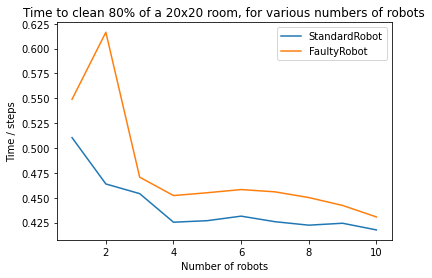

In [95]:
show_plot_compare_strategies('Time to clean 80% of a 20x20 room, for various numbers of robots','Number of robots','Time / steps')

Plotting cleaning time for a room of width: 10 by height: 30
Plotting cleaning time for a room of width: 20 by height: 15
Plotting cleaning time for a room of width: 25 by height: 12
Plotting cleaning time for a room of width: 50 by height: 6


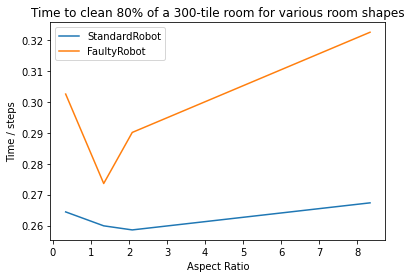

In [99]:
show_plot_room_shape('Time to clean 80% of a 300-tile room for various room shapes','Aspect Ratio', 'Time / steps')